# First Energy Linear Regression

This dataset was sourced from First Energy Corp and is used to show Multi-variable Linear Regression and Prediction. The notebook also explores the data extract, transform, and load process to be able to be used for the prediction model.

In [72]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# read in dataframe as df
df = pd.read_csv('/content/OH_Hrly_Data_010114_Present (1).csv', header = 9 )
# data download from: https://www.firstenergycorp.com/upp/pa/load_data.html

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# read in dataframe and verify for quality load using header
df.head(10)

,Date,Hour Ending,Unnamed: 2,CEI_NS_Commerical,CEI_NS_Industrial,CEI_NS_Residential,CEI_NS_Total,OE_NS_Commerical,OE_NS_Industrial,OE_NS_Residential,...,OE_S_Residential,OE_S_Total,TE_S_Commerical,TE_S_Industrial,TE_S_Residential,TE_S_Total,S_Total,Unnamed: 30,Total,Settlement
0,1/1/19,1.0,NaN,"57,868","20,465","77,321","155,654","76,879","27,302","194,555",...,"525,802","1,558,291","147,363","546,274","166,502","860,139","3,786,359",NaN,"4,336,193",S
1,1/1/19,2.0,NaN,"58,110","20,342","74,304","152,756","77,975","27,174","192,202",...,"510,051","1,512,008","148,195","538,530","158,938","845,662","3,683,304",NaN,"4,226,979",S
2,1/1/19,3.0,NaN,"57,076","20,537","72,400","150,013","75,344","26,764","184,324",...,"488,174","1,469,036","143,413","535,297","154,978","833,688","3,613,619",NaN,"4,141,529",S
3,1/1/19,4.0,NaN,"58,092","20,847","80,070","159,010","77,866","27,490","200,964",...,"529,268","1,556,032","145,600","542,221","155,738","843,559","3,754,159",NaN,"4,311,256",S
4,1/1/19,5.0,NaN,"58,138","20,811","83,010","161,959","76,972","27,300","212,164",...,"556,454","1,575,437","144,507","537,533","158,702","840,742","3,781,441",NaN,"4,352,660",S
5,1/1/19,6.0,NaN,"56,806","20,800","85,950","163,556","73,828","26,924","226,583",...,"593,769","1,569,079","141,932","533,960","166,712","842,604","3,795,384",NaN,"4,381,580",S
6,1/1/19,7.0,NaN,"58,744","22,025","94,192","174,961","77,036","27,316","249,568",...,"653,217","1,641,687","149,629","542,458","180,663","872,750","3,970,275",NaN,"4,601,078",S
7,1/1/19,8.0,NaN,"43,577","21,598","106,797","171,973","53,947","27,032","289,446",...,"757,808","1,814,324","141,567","537,407","204,287","883,260","4,207,167",NaN,"4,857,287",S
8,1/1/19,9.0,NaN,"43,584","21,632","117,387","182,603","52,191","27,351","317,080",...,"833,419","1,907,353","148,504","565,364","224,898","938,767","4,438,921",NaN,"5,133,166",S
9,1/1/19,10.0,NaN,"45,430","21,871","124,748","192,049","54,051","27,354","339,897",...,"895,024","1,992,242","154,170","559,665","242,464","956,299","4,591,792",NaN,"5,326,454",S


In [ ]:
# explore dataframe dimensions
df.shape

(48890, 33)

At this point, we have confirmed that the dataset is usable and we start to wrangle the data to have it in the correct form for the model. This process involves finding and removing null data, removing empty columns, setting appropriate data types, and creating useful columns. This is not intended for use as data management, but rather for data analysis, exploration, and modeling, which does not typically follow data management forms.

In [ ]:
# explore datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48890 entries, 0 to 48889
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                28464 non-null  object 
 1   Hour Ending         28464 non-null  float64
 2   Unnamed: 2          0 non-null      float64
 3   CEI_NS_Commerical   28464 non-null  object 
 4   CEI_NS_Industrial   28464 non-null  object 
 5   CEI_NS_Residential  28464 non-null  object 
 6   CEI_NS_Total        28464 non-null  object 
 7   OE_NS_Commerical    28464 non-null  object 
 8   OE_NS_Industrial    28464 non-null  object 
 9   OE_NS_Residential   28464 non-null  object 
 10  OE_NS_Total         28464 non-null  object 
 11  TE_NS_Commerical    28464 non-null  object 
 12  TE_NS_Industrial    28464 non-null  object 
 13  TE_NS_Residential   28464 non-null  object 
 14  TE_NS_Total         28464 non-null  object 
 15  NS_Total            28464 non-null  object 
 16  Unna

In [ ]:
# print list of columns
df.columns

Index(['Date', 'Hour Ending', 'Unnamed: 2', 'CEI_NS_Commerical',
       'CEI_NS_Industrial', 'CEI_NS_Residential', 'CEI_NS_Total',
       'OE_NS_Commerical', 'OE_NS_Industrial', 'OE_NS_Residential',
       'OE_NS_Total', 'TE_NS_Commerical', 'TE_NS_Industrial',
       'TE_NS_Residential', 'TE_NS_Total', 'NS_Total', 'Unnamed: 16',
       'CEI_S_Commerical', 'CEI_S_Industrial', 'CEI_S_Residential',
       'CEI_S_Total', 'OE_S_Commerical', 'OE_S_Industrial', 'OE_S_Residential',
       'OE_S_Total', 'TE_S_Commerical', 'TE_S_Industrial', 'TE_S_Residential',
       'TE_S_Total', 'S_Total', 'Unnamed: 30', 'Total', 'Settlement'],
      dtype='object')

In [ ]:
# create copy of df to preserve original
energy = df.copy()
# drop null columns
columns_drop = ['Unnamed: 2', 'Unnamed: 16', 'Unnamed: 30']
# dimensions before
print(energy.shape)
#drop columns
energy = energy.drop(labels = columns_drop, axis = 1)
# verify drop in columns
energy.shape

(48890, 33)


(48890, 30)

In [ ]:
#drop rows with null values
energy = energy.dropna(axis = 0)
energy.shape

(28416, 30)

In [ ]:
# verify null drop
energy.isnull().sum()

Date                  0
Hour Ending           0
CEI_NS_Commerical     0
CEI_NS_Industrial     0
CEI_NS_Residential    0
CEI_NS_Total          0
OE_NS_Commerical      0
OE_NS_Industrial      0
OE_NS_Residential     0
OE_NS_Total           0
TE_NS_Commerical      0
TE_NS_Industrial      0
TE_NS_Residential     0
TE_NS_Total           0
NS_Total              0
CEI_S_Commerical      0
CEI_S_Industrial      0
CEI_S_Residential     0
CEI_S_Total           0
OE_S_Commerical       0
OE_S_Industrial       0
OE_S_Residential      0
OE_S_Total            0
TE_S_Commerical       0
TE_S_Industrial       0
TE_S_Residential      0
TE_S_Total            0
S_Total               0
Total                 0
Settlement            0
dtype: int64

In [ ]:
# show statistical 
# numbers not working as number because dtype is object from info view
# need to change columns to numeric dtype
energy.describe(include = 'all')

,Date,Hour Ending,CEI_NS_Commerical,CEI_NS_Industrial,CEI_NS_Residential,CEI_NS_Total,OE_NS_Commerical,OE_NS_Industrial,OE_NS_Residential,OE_NS_Total,...,OE_S_Industrial,OE_S_Residential,OE_S_Total,TE_S_Commerical,TE_S_Industrial,TE_S_Residential,TE_S_Total,S_Total,Total,Settlement
count,28416,28416.000000,28416,28416,28416,28416,28416,28416,28416,28416,...,28416,28416,28416,28416,28416,28416,28416,28416,28416,28416
unique,1185,NaN,22164,17694,25012,26105,24373,18136,27067,27255,...,27643,27870,28162,26147,26961,26476,27650,28306,28328,2
top,11/1/20,NaN,"61,854","31,794","109,463","196,945","113,471","24,188","217,676","409,719",...,"801,815","508,371","2,096,112","145,751","772,146","185,438","1,026,809","4,513,716","6,470,315",S
freq,25,NaN,7,9,5,4,5,8,4,4,...,3,3,2,4,3,4,3,2,2,27048
mean,NaN,12.502252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,6.922918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# create list of columns that need to be set as integer types

to_numeric_list = ['CEI_NS_Commerical', 'CEI_NS_Industrial',
       'CEI_NS_Residential', 'CEI_NS_Total', 'OE_NS_Commerical',
       'OE_NS_Industrial', 'OE_NS_Residential', 'OE_NS_Total',
       'TE_NS_Commerical', 'TE_NS_Industrial', 'TE_NS_Residential',
       'TE_NS_Total', 'NS_Total', 'CEI_S_Commerical', 'CEI_S_Industrial',
       'CEI_S_Residential', 'CEI_S_Total', 'OE_S_Commerical',
       'OE_S_Industrial', 'OE_S_Residential', 'OE_S_Total', 'TE_S_Commerical',
       'TE_S_Industrial', 'TE_S_Residential', 'TE_S_Total', 'S_Total', 'Total',]
def to_integer_func(list, df):
    for item in list:
        df[item] = df[item].astype(int)
def int_ready(item, df):
    for item in df:
        df[item] = [x if type(x) == float else x.replace(',','') for x in df[item]]
    return df
int_ready(to_numeric_list, energy)
to_integer_func(to_numeric_list, energy)

In [ ]:
# shown without include = 'all' parameter and shows statistical ranges meaning the numbes have converted
energy.describe()

,Hour Ending,CEI_NS_Commerical,CEI_NS_Industrial,CEI_NS_Residential,CEI_NS_Total,OE_NS_Commerical,OE_NS_Industrial,OE_NS_Residential,OE_NS_Total,TE_NS_Commerical,...,OE_S_Commerical,OE_S_Industrial,OE_S_Residential,OE_S_Total,TE_S_Commerical,TE_S_Industrial,TE_S_Residential,TE_S_Total,S_Total,Total
count,28416.000000,28416.000000,28416.000000,28416.000000,28416.000000,28416.000000,28416.000000,28416.000000,28416.000000,28416.000000,...,2.841600e+04,2.841600e+04,2.841600e+04,2.841600e+04,28416.000000,28416.000000,28416.000000,2.841600e+04,2.841600e+04,2.841600e+04
mean,12.502252,62210.629962,38128.084530,117039.253871,217377.971530,96866.363633,28796.368032,296363.586219,422026.316653,25691.781391,...,6.923917e+05,8.403808e+05,8.033967e+05,2.336169e+06,201774.731032,695021.652766,220035.141082,1.116832e+06,5.352098e+06,6.112198e+06
std,6.922918,15624.283315,17753.216024,36299.242054,48585.767761,26690.512113,12695.282428,84567.357649,96683.418625,7369.396048,...,2.384599e+05,1.364728e+05,2.371993e+05,4.555798e+05,56061.214317,77338.295004,73538.538670,1.588243e+05,9.306861e+05,1.072609e+06
min,1.000000,22585.000000,16938.000000,47160.000000,105633.000000,32580.000000,11862.000000,117247.000000,184896.000000,9436.000000,...,3.371700e+05,4.463190e+05,3.341930e+05,1.237567e+06,97440.000000,379520.000000,89680.000000,6.314360e+05,3.079108e+06,3.472410e+06
25%,7.000000,51700.500000,30484.000000,92836.750000,182678.750000,80074.000000,20793.250000,236902.000000,353591.000000,19696.250000,...,4.979402e+05,7.402202e+05,6.446118e+05,1.975003e+06,156911.500000,643425.000000,172442.500000,1.000198e+06,4.618394e+06,5.274454e+06
50%,13.000000,59964.000000,33758.000000,111023.500000,211982.500000,92743.500000,25160.500000,281816.500000,409434.000000,24236.500000,...,6.078550e+05,8.523200e+05,7.632300e+05,2.300427e+06,185269.500000,698690.000000,205402.000000,1.107094e+06,5.278085e+06,6.049749e+06
75%,19.000000,72749.000000,39023.250000,133405.500000,246524.000000,114976.750000,32773.750000,347409.250000,486279.500000,31246.250000,...,8.994668e+05,9.436755e+05,9.192010e+05,2.673766e+06,245833.000000,750937.500000,249016.250000,1.222262e+06,6.022924e+06,6.876829e+06
max,25.000000,114315.000000,230854.000000,325520.000000,496002.000000,168324.000000,85660.000000,790116.000000,868146.000000,50622.000000,...,1.318870e+06,1.176099e+06,2.372587e+06,4.037459e+06,387020.000000,905994.000000,697467.000000,1.725847e+06,8.940340e+06,1.045991e+07


In [ ]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28416 entries, 0 to 28415
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                28416 non-null  object 
 1   Hour Ending         28416 non-null  float64
 2   CEI_NS_Commerical   28416 non-null  int64  
 3   CEI_NS_Industrial   28416 non-null  int64  
 4   CEI_NS_Residential  28416 non-null  int64  
 5   CEI_NS_Total        28416 non-null  int64  
 6   OE_NS_Commerical    28416 non-null  int64  
 7   OE_NS_Industrial    28416 non-null  int64  
 8   OE_NS_Residential   28416 non-null  int64  
 9   OE_NS_Total         28416 non-null  int64  
 10  TE_NS_Commerical    28416 non-null  int64  
 11  TE_NS_Industrial    28416 non-null  int64  
 12  TE_NS_Residential   28416 non-null  int64  
 13  TE_NS_Total         28416 non-null  int64  
 14  NS_Total            28416 non-null  int64  
 15  CEI_S_Commerical    28416 non-null  int64  
 16  CEI_

In [ ]:
# investigate settlement column
energy['Settlement'].value_counts(dropna = False)
# string variable binary

S    27048
P     1368
Name: Settlement, dtype: int64

In [ ]:
# investigate Date column
energy['Date'].value_counts()
# hours =! 24 are for daylight savings time

11/1/20    25
11/7/21    25
11/3/19    25
1/1/19     24
2/25/21    24
           ..
3/8/20     23
3/14/21    23
3/10/19    23
3/14/22    23
3/30/22     1
Name: Date, Length: 1185, dtype: int64

In [ ]:
# investigate hour column
energy['Hour Ending'].value_counts()

1.0     1185
14.0    1184
24.0    1184
23.0    1184
22.0    1184
21.0    1184
20.0    1184
19.0    1184
18.0    1184
17.0    1184
16.0    1184
15.0    1184
13.0    1184
2.0     1184
12.0    1184
11.0    1184
10.0    1184
9.0     1184
8.0     1184
7.0     1184
6.0     1184
5.0     1184
4.0     1184
3.0     1180
25.0       3
Name: Hour Ending, dtype: int64

For purposes of data calculation for machine learning, any outliers such as '3/30/22' for date or '25.0' for Ending Hour should be removed to not skew data for best linear regression model

In [ ]:
# remove outliers
# outlier date removal
outlier_date = '3/30/22'
print(energy.shape)
energy = energy[energy['Date'] != outlier_date]
print(energy.shape)
# observation count should drop by one

(28416, 30)
(28415, 30)


In [ ]:
# remove 25 hour count
hour_outlier = 25
print(energy.shape)
energy = energy[energy['Hour Ending'] != hour_outlier]
print(energy.shape)
# observation count should drop by 3

(28415, 30)
(28412, 30)


In [ ]:
# replace float to int
energy['Hour Ending'] = energy['Hour Ending'].astype(int)

In [ ]:
# convert date from object type to datetime type
energy['Date Time'] = pd.to_datetime(energy['Date'] + str(' ') + (energy['Hour Ending']-1).astype(str) + str(':00:00'))
# verification
energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28412 entries, 0 to 28414
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                28412 non-null  object        
 1   Hour Ending         28412 non-null  int64         
 2   CEI_NS_Commerical   28412 non-null  int64         
 3   CEI_NS_Industrial   28412 non-null  int64         
 4   CEI_NS_Residential  28412 non-null  int64         
 5   CEI_NS_Total        28412 non-null  int64         
 6   OE_NS_Commerical    28412 non-null  int64         
 7   OE_NS_Industrial    28412 non-null  int64         
 8   OE_NS_Residential   28412 non-null  int64         
 9   OE_NS_Total         28412 non-null  int64         
 10  TE_NS_Commerical    28412 non-null  int64         
 11  TE_NS_Industrial    28412 non-null  int64         
 12  TE_NS_Residential   28412 non-null  int64         
 13  TE_NS_Total         28412 non-null  int64     

In [ ]:
# visual verification and assessment
energy.head()

,Date,Hour Ending,CEI_NS_Commerical,CEI_NS_Industrial,CEI_NS_Residential,CEI_NS_Total,OE_NS_Commerical,OE_NS_Industrial,OE_NS_Residential,OE_NS_Total,...,OE_S_Residential,OE_S_Total,TE_S_Commerical,TE_S_Industrial,TE_S_Residential,TE_S_Total,S_Total,Total,Settlement,Date Time
0,1/1/19,1,57868,20465,77321,155654,76879,27302,194555,298736,...,525802,1558291,147363,546274,166502,860139,3786359,4336193,S,2019-01-01 00:00:00
1,1/1/19,2,58110,20342,74304,152756,77975,27174,192202,297350,...,510051,1512008,148195,538530,158938,845662,3683304,4226979,S,2019-01-01 01:00:00
2,1/1/19,3,57076,20537,72400,150013,75344,26764,184324,286431,...,488174,1469036,143413,535297,154978,833688,3613619,4141529,S,2019-01-01 02:00:00
3,1/1/19,4,58092,20847,80070,159010,77866,27490,200964,306320,...,529268,1556032,145600,542221,155738,843559,3754159,4311256,S,2019-01-01 03:00:00
4,1/1/19,5,58138,20811,83010,161959,76972,27300,212164,316436,...,556454,1575437,144507,537533,158702,840742,3781441,4352660,S,2019-01-01 04:00:00


In [ ]:
# verify type change
energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28412 entries, 0 to 28414
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                28412 non-null  object        
 1   Hour Ending         28412 non-null  int64         
 2   CEI_NS_Commerical   28412 non-null  int64         
 3   CEI_NS_Industrial   28412 non-null  int64         
 4   CEI_NS_Residential  28412 non-null  int64         
 5   CEI_NS_Total        28412 non-null  int64         
 6   OE_NS_Commerical    28412 non-null  int64         
 7   OE_NS_Industrial    28412 non-null  int64         
 8   OE_NS_Residential   28412 non-null  int64         
 9   OE_NS_Total         28412 non-null  int64         
 10  TE_NS_Commerical    28412 non-null  int64         
 11  TE_NS_Industrial    28412 non-null  int64         
 12  TE_NS_Residential   28412 non-null  int64         
 13  TE_NS_Total         28412 non-null  int64     

The next section shows a collection of graphs of notice of the data separated by company and shoppable designation. This section is to show data visualization and use of pyplot, while illustrating topics of note within the data that could prove useful in a business presentation setting.

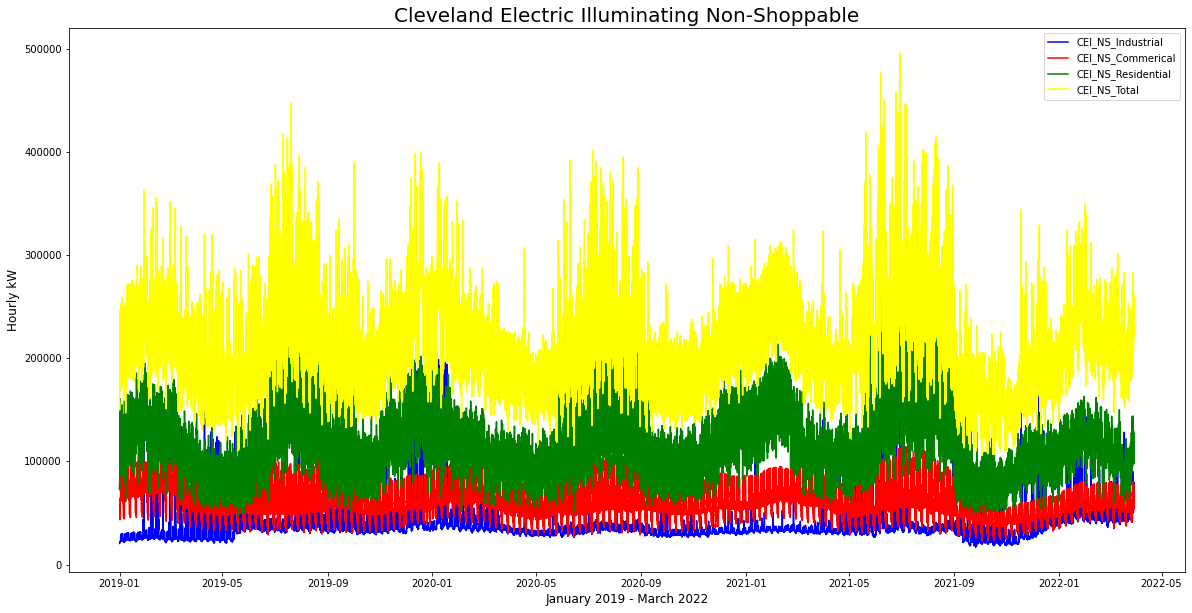

In [ ]:
# CEI Non-shoppable graph
datetime_axis = energy['Date Time']
cei_list = energy.columns[2:6]
plt.figure(figsize= (20,10))
plt.title('Cleveland Electric Illuminating Non-Shoppable', size = 20)
plt.ylabel('Hourly kW', size = 12)
plt.xlabel('January 2019 - March 2022', size = 12)
plt.plot(datetime_axis, energy[cei_list[1]], color = 'blue', label = cei_list[1])
plt.plot(datetime_axis, energy[cei_list[0]], color = 'red', label = cei_list[0])
plt.plot(datetime_axis, energy[cei_list[2]], color = 'green', label = cei_list[2])
plt.plot(datetime_axis, energy[cei_list[3]], color = 'yellow', label = cei_list[3])
plt.legend()
plt.show()

In [ ]:
energy.columns

Index(['Date', 'Hour Ending', 'CEI_NS_Commerical', 'CEI_NS_Industrial',
       'CEI_NS_Residential', 'CEI_NS_Total', 'OE_NS_Commerical',
       'OE_NS_Industrial', 'OE_NS_Residential', 'OE_NS_Total',
       'TE_NS_Commerical', 'TE_NS_Industrial', 'TE_NS_Residential',
       'TE_NS_Total', 'NS_Total', 'CEI_S_Commerical', 'CEI_S_Industrial',
       'CEI_S_Residential', 'CEI_S_Total', 'OE_S_Commerical',
       'OE_S_Industrial', 'OE_S_Residential', 'OE_S_Total', 'TE_S_Commerical',
       'TE_S_Industrial', 'TE_S_Residential', 'TE_S_Total', 'S_Total', 'Total',
       'Settlement', 'Date Time'],
      dtype='object')

In [ ]:
oe_ns = ['OE_NS_Commerical',
       'OE_NS_Industrial', 'OE_NS_Residential', 'OE_NS_Total']
te_ns = ['TE_NS_Commerical', 'TE_NS_Industrial', 'TE_NS_Residential',
       'TE_NS_Total']
cei_s = ['CEI_S_Commerical', 'CEI_S_Industrial',
       'CEI_S_Residential', 'CEI_S_Total']
oe_s = ['OE_S_Commerical',
       'OE_S_Industrial', 'OE_S_Residential', 'OE_S_Total']
te_s = ['TE_S_Commerical',
       'TE_S_Industrial', 'TE_S_Residential', 'TE_S_Total']

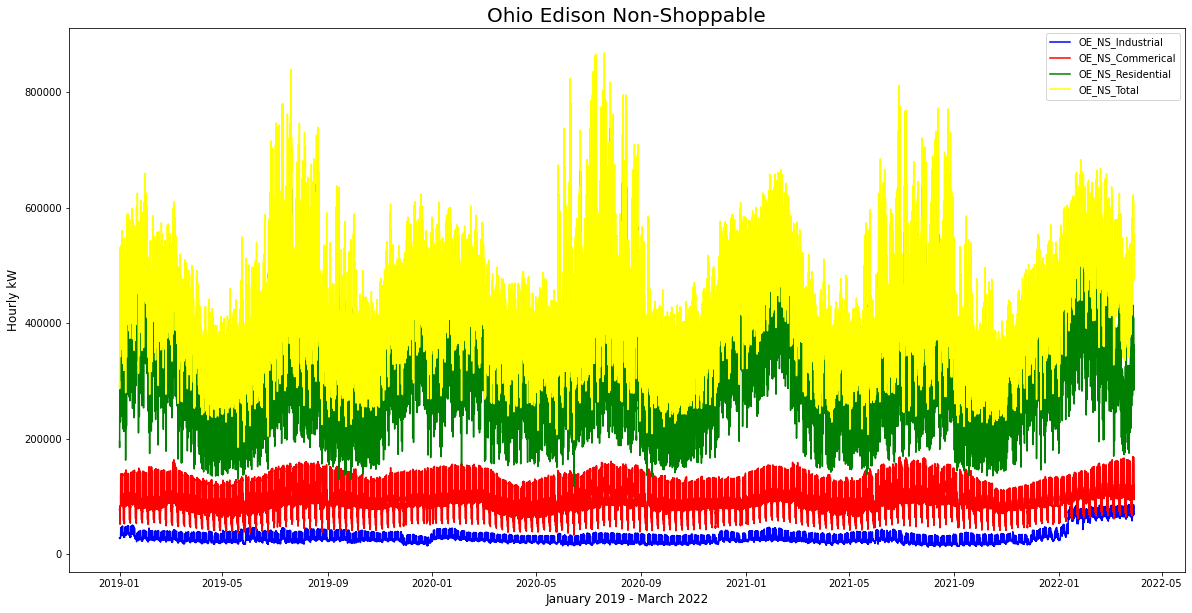

In [ ]:
plt.figure(figsize= (20,10))
plt.title('Ohio Edison Non-Shoppable', size = 20)
plt.ylabel('Hourly kW', size = 12)
plt.xlabel('January 2019 - March 2022', size = 12)
plt.plot(datetime_axis, energy[oe_ns[1]], color = 'blue', label = oe_ns[1])
plt.plot(datetime_axis, energy[oe_ns[0]], color = 'red', label = oe_ns[0])
plt.plot(datetime_axis, energy[oe_ns[2]], color = 'green', label = oe_ns[2])
plt.plot(datetime_axis, energy[oe_ns[3]], color = 'yellow', label = oe_ns[3])
plt.legend()
plt.show()

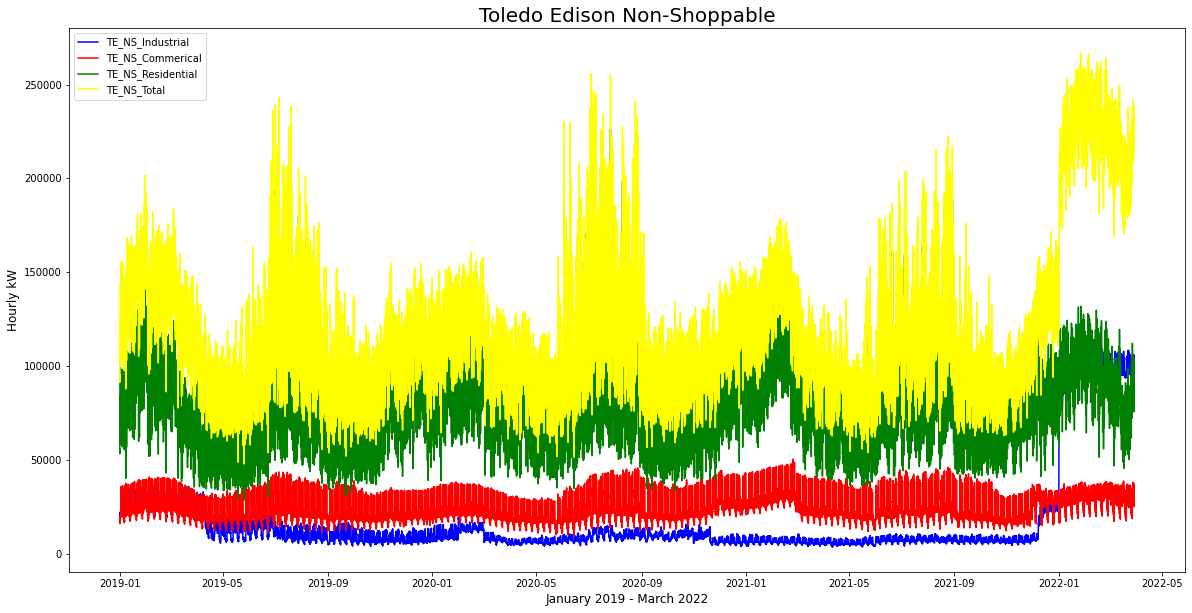

In [ ]:
plt.figure(figsize= (20,10))
plt.title('Toledo Edison Non-Shoppable', size = 20)
plt.ylabel('Hourly kW', size = 12)
plt.xlabel('January 2019 - March 2022', size = 12)
plt.plot(datetime_axis, energy[te_ns[1]], color = 'blue', label = te_ns[1])
plt.plot(datetime_axis, energy[te_ns[0]], color = 'red', label = te_ns[0])
plt.plot(datetime_axis, energy[te_ns[2]], color = 'green', label = te_ns[2])
plt.plot(datetime_axis, energy[te_ns[3]], color = 'yellow', label = te_ns[3])
plt.legend()
plt.show()

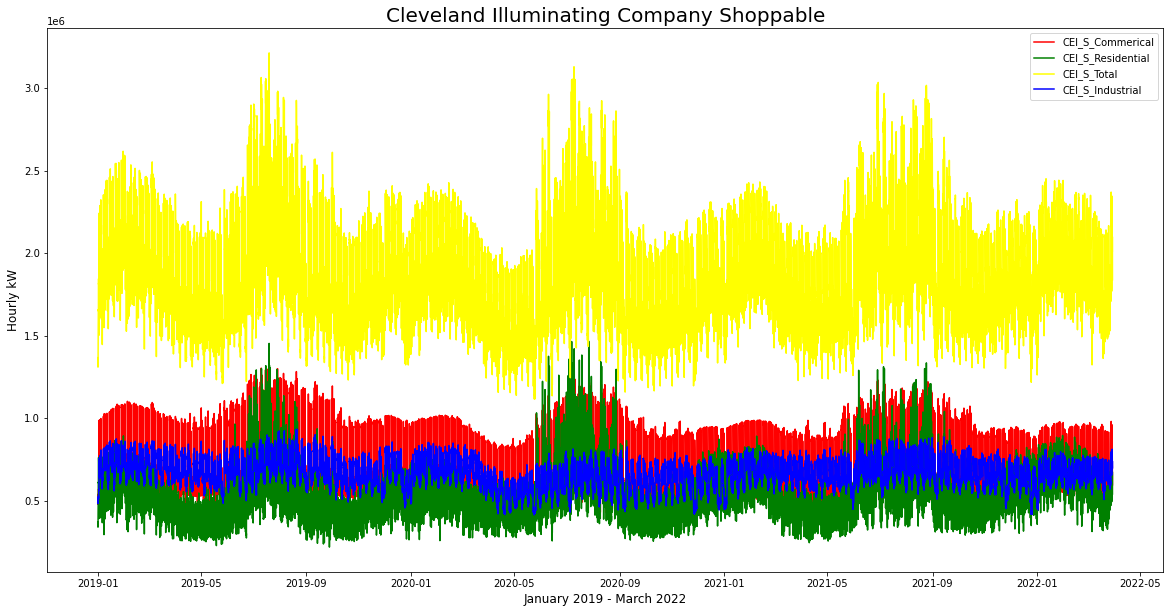

In [ ]:
plt.figure(figsize= (20,10))
plt.title('Cleveland Illuminating Company Shoppable', size = 20)
plt.ylabel('Hourly kW', size = 12)
plt.xlabel('January 2019 - March 2022', size = 12)

plt.plot(datetime_axis, energy[cei_s[0]], color = 'red', label = cei_s[0])
plt.plot(datetime_axis, energy[cei_s[2]], color = 'green', label = cei_s[2])
plt.plot(datetime_axis, energy[cei_s[3]], color = 'yellow', label = cei_s[3])
plt.plot(datetime_axis, energy[cei_s[1]], color = 'blue', label = cei_s[1])
plt.legend()
plt.show()

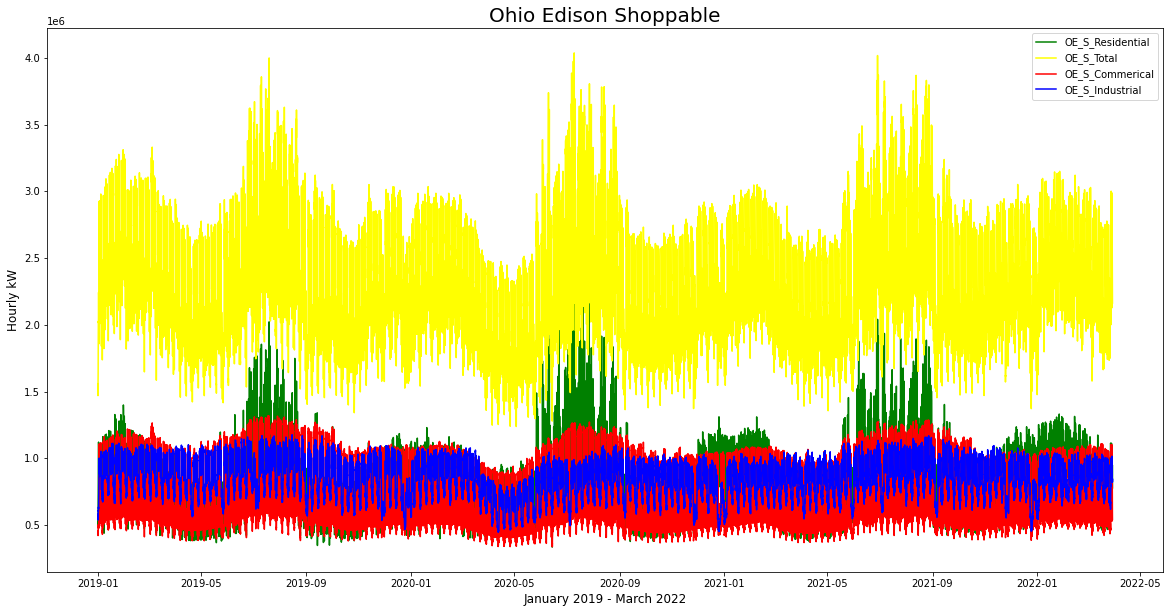

In [ ]:
plt.figure(figsize= (20,10))
plt.title('Ohio Edison Shoppable', size = 20)
plt.ylabel('Hourly kW', size = 12)
plt.xlabel('January 2019 - March 2022', size = 12)

plt.plot(datetime_axis, energy[oe_s[2]], color = 'green', label = oe_s[2])
plt.plot(datetime_axis, energy[oe_s[3]], color = 'yellow', label = oe_s[3])
plt.plot(datetime_axis, energy[oe_s[0]], color = 'red', label = oe_s[0])
plt.plot(datetime_axis, energy[oe_s[1]], color = 'blue', label = oe_s[1])

plt.legend()
plt.show()

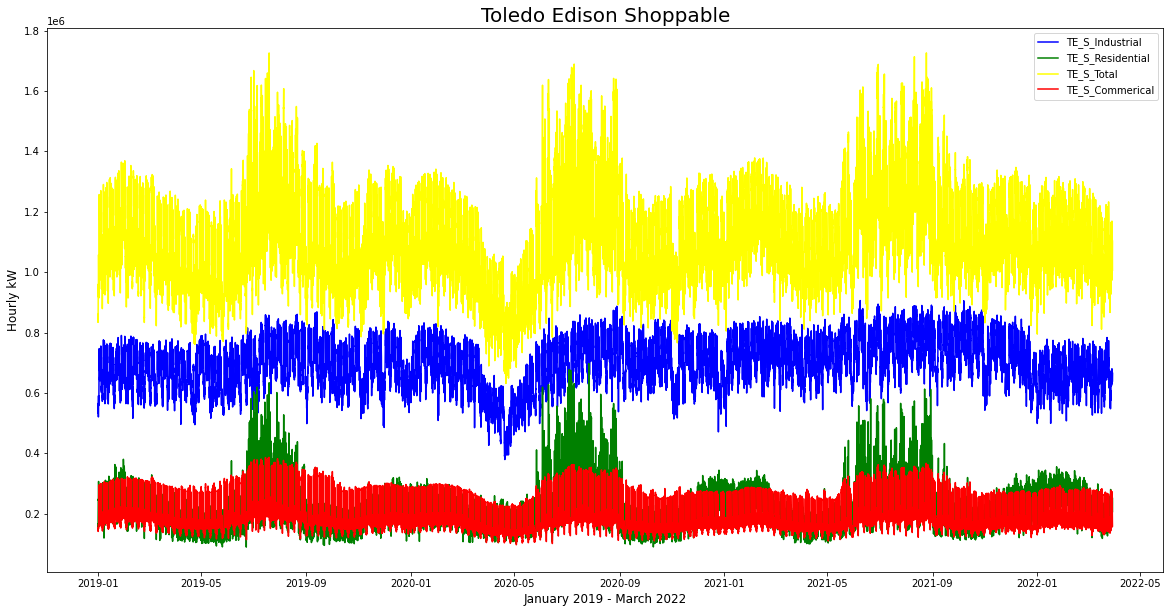

In [ ]:
plt.figure(figsize= (20,10))
plt.title('Toledo Edison Shoppable', size = 20)
plt.ylabel('Hourly kW', size = 12)
plt.xlabel('January 2019 - March 2022', size = 12)
plt.plot(datetime_axis, energy[te_s[1]], color = 'blue', label = te_s[1])

plt.plot(datetime_axis, energy[te_s[2]], color = 'green', label = te_s[2])
plt.plot(datetime_axis, energy[te_s[3]], color = 'yellow', label = te_s[3])
plt.plot(datetime_axis, energy[te_s[0]], color = 'red', label = te_s[0])
plt.legend()
plt.show()

In [ ]:
# Create Day for number of day within year
energy['Day'] = energy['Date Time'].dt.dayofyear

In [ ]:
energy.columns

Index(['Date', 'Hour Ending', 'CEI_NS_Commerical', 'CEI_NS_Industrial',
       'CEI_NS_Residential', 'CEI_NS_Total', 'OE_NS_Commerical',
       'OE_NS_Industrial', 'OE_NS_Residential', 'OE_NS_Total',
       'TE_NS_Commerical', 'TE_NS_Industrial', 'TE_NS_Residential',
       'TE_NS_Total', 'NS_Total', 'CEI_S_Commerical', 'CEI_S_Industrial',
       'CEI_S_Residential', 'CEI_S_Total', 'OE_S_Commerical',
       'OE_S_Industrial', 'OE_S_Residential', 'OE_S_Total', 'TE_S_Commerical',
       'TE_S_Industrial', 'TE_S_Residential', 'TE_S_Total', 'S_Total', 'Total',
       'Settlement', 'Date Time', 'Day'],
      dtype='object')

After the visual graphs, a great business question revolves around prediction and what businsses could expect. The following graphs show an initial display of the combination of the companies usage follow by a mean average prediction line of kWh used hourly.

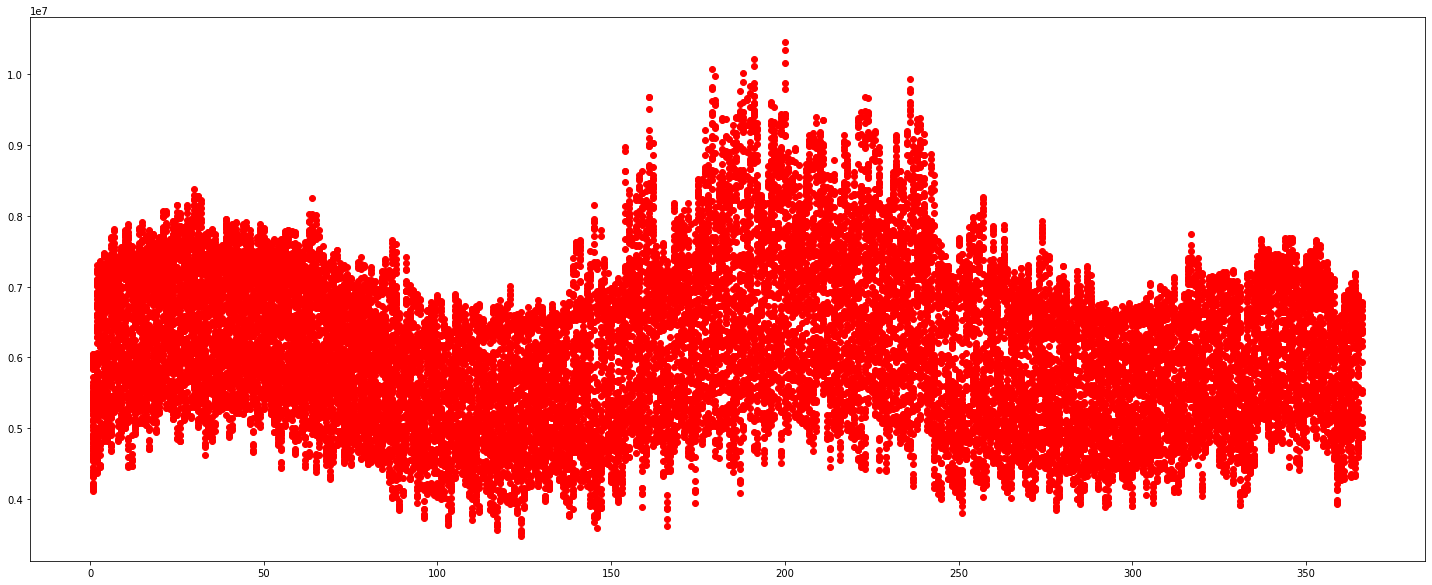

In [60]:
# graph showing all times for every hour by day of year for total kWh usage
plt.figure(figsize = (25, 10))
plt.scatter(energy['Day'], energy['Total'], color = 'red')
plt.show();

In [39]:
ind_var = energy['Day']
dep_var = energy['Total']

# use np polyfit to fit data to draw prediction line

model = np.poly1d(np.polyfit(ind_var, dep_var, 5))


The follow graph shows an estimated average usage line, a higher limit usage line of 1.25x of the average, and a lower limit usage line of .75x of the average.

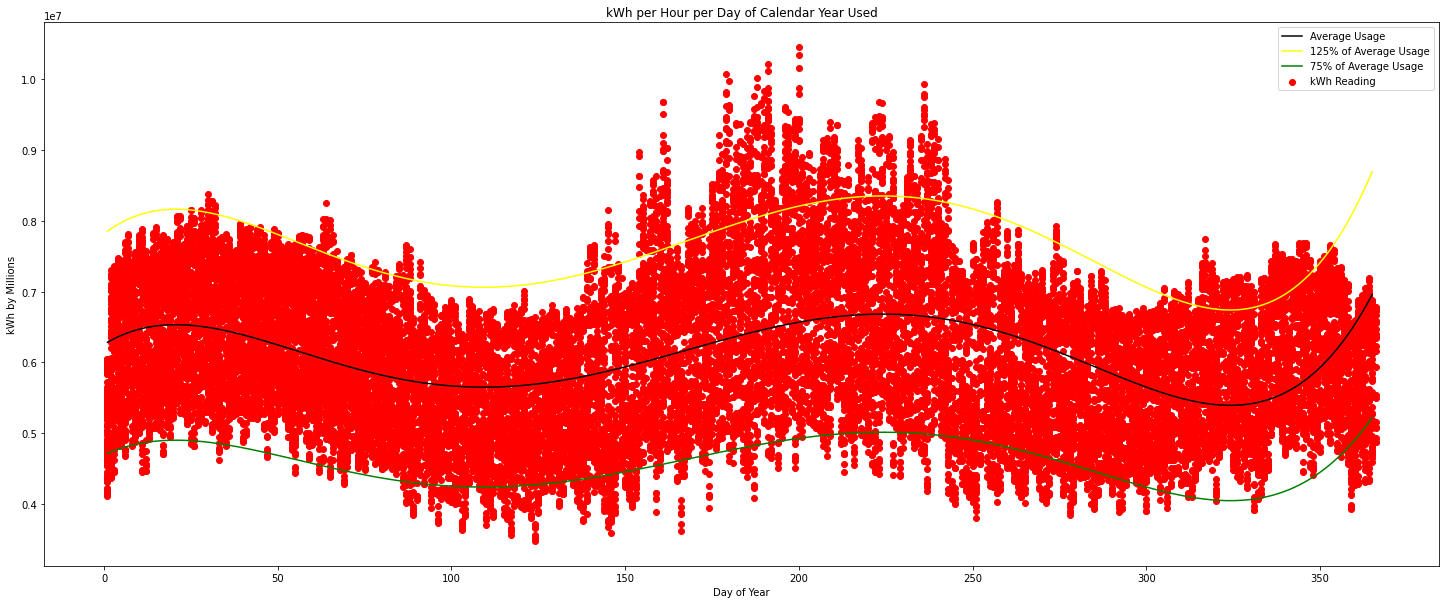

In [67]:
# regraph with fit line
#add fitted polynomial line to scatterplot
polyline = np.linspace(1, 365, 500)
plt.figure(figsize = (25, 10))
plt.title('kWh per Hour per Day of Calendar Year Used')
plt.xlabel('Day of Year')
plt.ylabel('kWh by Millions')
plt.scatter(ind_var, dep_var, color = 'red')
plt.plot(polyline, model(polyline), color = 'black')
plt.plot(polyline, model(polyline)*1.25, color = 'yellow')
plt.plot(polyline, model(polyline)*.75, color = 'green')
plt.legend(['Average Usage',  '125% of Average Usage', '75% of Average Usage', 'kWh Reading'] )
plt.show()

In [43]:
# Show coefficients of multivariable line fit
print(model)

           5           4         3         2
3.663e-05 x - 0.03105 x + 8.925 x - 978.5 x + 3.011e+04 x + 6.254e+06


In [84]:
# Create function to show estimated prediction for 2023 of kWh average, high, and low limits
prediction = model

def electric_prediction(x):
    date_usage = datetime.strptime(str(2023) + "-" + str(x), "%Y-%j").strftime("%m-%d-%Y")
    print('For '+ str(date_usage) +  ' the estimated mean average usage is ' + str(prediction(x)*24) + ' kWh.')
    print('Estimated upper level usage is ' + str(prediction(x)*1.25*24) + ' kWh for the day.')
    print('Estimated lower level usage is ' + str(prediction(x)*.75*24) + ' kWh for the day.')


In [85]:
electric_prediction(180)

For 06-29-2023 the estimated mean average usage is 152183782.8820406 kWh.
Estimated upper level usage is 190229728.60255075 kWh for the day.
Estimated lower level usage is 114137837.16153044 kWh for the day.
